<a href="https://colab.research.google.com/github/teehere/L-Or-al-x-Monash-Datathon-2025/blob/main/L%E2%80%99Or%C3%A9al_x_Monash_Datathon_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import glob

csv_files = glob.glob("comments*.csv")   # matches comments1.csv, comments2.csv,...

dfs = [pd.read_csv(f) for f in csv_files]

merged_df = pd.concat(dfs, ignore_index=True)

# save to a new CSV
merged_df.to_csv("all_comments.csv", index=False)

Merged shape: (1000000, 10)
              kind  commentId  channelId  videoId  authorId  \
0  youtube#comment    1781382      14492    74288   2032536   
1  youtube#comment     289571      14727    79618   3043229   
2  youtube#comment     569077       3314    51826    917006   
3  youtube#comment    2957962       5008    58298   1853470   
4  youtube#comment     673093      21411     1265   2584166   

                                        textOriginal  parentCommentId  \
0  PLEASE LESBIAN FLAG I BEG YOU \n\nYou would ro...              NaN   
1   Apply mashed potato juice and mixed it with curd        3198066.0   
2                         69 missed calls from mars👽              NaN   
3                                               Baaa              NaN   
4    you look like raven from phenomena raven no cap              NaN   

   likeCount                publishedAt                  updatedAt  
0          0  2023-08-15 21:48:52+00:00  2023-08-15 21:48:52+00:00  
1          0  20

In [ ]:
comments = pd.read_csv("all_comments.csv", engine="python", on_bad_lines="skip")
print("Comments shape:", comments.shape)
print(comments.head())

print()
videos = pd.read_csv("videos.csv", engine="python", on_bad_lines="skip")
print("Videos shape:", videos.shape)
print(videos.head())


Comments shape: (1000000, 10)
              kind  commentId  channelId  videoId  authorId  \
0  youtube#comment    1781382      14492    74288   2032536   
1  youtube#comment     289571      14727    79618   3043229   
2  youtube#comment     569077       3314    51826    917006   
3  youtube#comment    2957962       5008    58298   1853470   
4  youtube#comment     673093      21411     1265   2584166   

                                        textOriginal  parentCommentId  \
0  PLEASE LESBIAN FLAG I BEG YOU \n\nYou would ro...              NaN   
1   Apply mashed potato juice and mixed it with curd        3198066.0   
2                         69 missed calls from mars👽              NaN   
3                                               Baaa              NaN   
4    you look like raven from phenomena raven no cap              NaN   

   likeCount                publishedAt                  updatedAt  
0          0  2023-08-15 21:48:52+00:00  2023-08-15 21:48:52+00:00  
1          0  

In [ ]:
# install
'''
!pip install langdetect
!pip install deep_translator


from langdetect import detect
from deep_translator import GoogleTranslator

def detect_language(text):
    try:
        return detect(text) if pd.notnull(text) else "unknown"
    except:
        return "unknown"

df['language'] = df['textOriginal'].apply(detect_language)
print(df[['textOriginal', 'language']].head())


def translate_to_english(text):
    try:
        if pd.notnull(text):
            return GoogleTranslator(source='auto', target='en').translate(text)
        return ""
    except:
        return ""

 df['text_en'] = df['textOriginal'].apply(translate_to_english)

 df.to_csv("merged_comments_videos.csv", index=False, encoding="utf-8")'''

In [ ]:
# merge both all_comments.csv and videos.csv
df = comments.merge(videos, on="videoId", how="left")
print("Merged shape:", df.shape)
print(df.head())


Merged shape: (1000000, 24)
            kind_x  commentId  channelId_x  videoId  authorId  \
0  youtube#comment    1781382        14492    74288   2032536   
1  youtube#comment     289571        14727    79618   3043229   
2  youtube#comment     569077         3314    51826    917006   
3  youtube#comment    2957962         5008    58298   1853470   
4  youtube#comment     673093        21411     1265   2584166   

                                        textOriginal  parentCommentId  \
0  PLEASE LESBIAN FLAG I BEG YOU \n\nYou would ro...              NaN   
1   Apply mashed potato juice and mixed it with curd        3198066.0   
2                         69 missed calls from mars👽              NaN   
3                                               Baaa              NaN   
4    you look like raven from phenomena raven no cap              NaN   

   likeCount_x              publishedAt_x                  updatedAt  ...  \
0            0  2023-08-15 21:48:52+00:00  2023-08-15 21:48:52+00

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   kind_x                1000000 non-null  object 
 1   commentId             1000000 non-null  int64  
 2   channelId_x           1000000 non-null  int64  
 3   videoId               1000000 non-null  int64  
 4   authorId              1000000 non-null  int64  
 5   textOriginal          999954 non-null   object 
 6   parentCommentId       109713 non-null   float64
 7   likeCount_x           1000000 non-null  int64  
 8   publishedAt_x         1000000 non-null  object 
 9   updatedAt             1000000 non-null  object 
 10  kind_y                999677 non-null   object 
 11  publishedAt_y         999677 non-null   object 
 12  channelId_y           999677 non-null   float64
 13  title                 999677 non-null   object 
 14  description           525286 non-nu

In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicates: ", duplicates)

Number of duplicates:  0


In [ ]:
cols = df.columns
for col in cols:
    num_nulls = df[col].isnull().sum()
    num_zeros = (df[col] == 0).sum()
    print(f"{col}: ")
    print(f"{num_nulls} nulls ({num_nulls/len(df)*100:.2f}%), ")
    print(f"{num_zeros} zeros ({num_zeros/len(df)*100:.2f}%)")
    print()


kind_x: 
0 nulls (0.00%), 
0 zeros (0.00%)

commentId: 
0 nulls (0.00%), 
0 zeros (0.00%)

channelId_x: 
0 nulls (0.00%), 
0 zeros (0.00%)

videoId: 
0 nulls (0.00%), 
104 zeros (0.01%)

authorId: 
0 nulls (0.00%), 
0 zeros (0.00%)

textOriginal: 
46 nulls (0.00%), 
0 zeros (0.00%)

parentCommentId: 
890287 nulls (89.03%), 
0 zeros (0.00%)

likeCount_x: 
0 nulls (0.00%), 
796175 zeros (79.62%)

publishedAt_x: 
0 nulls (0.00%), 
0 zeros (0.00%)

updatedAt: 
0 nulls (0.00%), 
0 zeros (0.00%)

kind_y: 
323 nulls (0.03%), 
0 zeros (0.00%)

publishedAt_y: 
323 nulls (0.03%), 
0 zeros (0.00%)

channelId_y: 
323 nulls (0.03%), 
0 zeros (0.00%)

title: 
323 nulls (0.03%), 
0 zeros (0.00%)

description: 
474714 nulls (47.47%), 
0 zeros (0.00%)

tags: 
620178 nulls (62.02%), 
0 zeros (0.00%)

defaultLanguage: 
833288 nulls (83.33%), 
0 zeros (0.00%)

defaultAudioLanguage: 
505491 nulls (50.55%), 
0 zeros (0.00%)

contentDuration: 
10098 nulls (1.01%), 
0 zeros (0.00%)

viewCount: 
10098 nulls (1

# **Data Cleaning**

In [ ]:
# drop those meaningless rows (ids cannot be 0 & comments must exists)
df = df[(df["commentId"] != 0) & (df["authorId"] != 0) & (df["videoId"] != 0)]
df = df.dropna(subset=["textOriginal"])

# make sure proper date convertion
df["publishedAt_x"] = pd.to_datetime(df["publishedAt_x"], errors="coerce")
df["updatedAt"]     = pd.to_datetime(df["updatedAt"], errors="coerce")
df["publishedAt_y"] = pd.to_datetime(df["publishedAt_y"], errors="coerce")

# fill with empty strings
df["description"] = df["description"].fillna("")
df["tags"] = df["tags"].fillna("")

# fill with "unknown"
df["defaultLanguage"] = df["defaultLanguage"].fillna("unknown")
df["defaultAudioLanguage"] = df["defaultAudioLanguage"].fillna("unknown")

# drop cols
for col in ["viewCount", "likeCount_y", "commentCount", "contentDuration", "topicCategories"]:
    df = df.dropna(subset=[col])

# drop favouriteCount (due to 99% zeros)
df = df.drop(columns=["favouriteCount"])

# apply log transform to engagement counts (reduce skewness)
for col in ["viewCount", "likeCount_y", "commentCount"]:
    df[f"log_{col}"] = np.log1p(df[col])

In [ ]:
cols = df.columns
for col in cols:
    num_nulls = df[col].isnull().sum()
    num_zeros = (df[col] == 0).sum()
    print(f"{col}: ")
    print(f"{num_nulls} nulls ({num_nulls/len(df)*100:.2f}%), ")
    print(f"{num_zeros} zeros ({num_zeros/len(df)*100:.2f}%)")
    print()


kind_x: 
0 nulls (0.00%), 
0 zeros (0.00%)

commentId: 
0 nulls (0.00%), 
0 zeros (0.00%)

channelId_x: 
0 nulls (0.00%), 
0 zeros (0.00%)

videoId: 
0 nulls (0.00%), 
0 zeros (0.00%)

authorId: 
0 nulls (0.00%), 
0 zeros (0.00%)

textOriginal: 
0 nulls (0.00%), 
0 zeros (0.00%)

parentCommentId: 
843091 nulls (89.13%), 
0 zeros (0.00%)

likeCount_x: 
0 nulls (0.00%), 
753623 zeros (79.67%)

publishedAt_x: 
0 nulls (0.00%), 
0 zeros (0.00%)

updatedAt: 
0 nulls (0.00%), 
0 zeros (0.00%)

kind_y: 
0 nulls (0.00%), 
0 zeros (0.00%)

publishedAt_y: 
0 nulls (0.00%), 
0 zeros (0.00%)

channelId_y: 
0 nulls (0.00%), 
0 zeros (0.00%)

title: 
0 nulls (0.00%), 
0 zeros (0.00%)

description: 
0 nulls (0.00%), 
0 zeros (0.00%)

tags: 
0 nulls (0.00%), 
0 zeros (0.00%)

defaultLanguage: 
0 nulls (0.00%), 
0 zeros (0.00%)

defaultAudioLanguage: 
0 nulls (0.00%), 
0 zeros (0.00%)

contentDuration: 
0 nulls (0.00%), 
0 zeros (0.00%)

viewCount: 
0 nulls (0.00%), 
2 zeros (0.00%)

likeCount_y: 
0 nu

# **EDA**

In [ ]:
print("Total comments:", len(df))
print("Unique videos:", df["videoId"].nunique())
print("Unique authors:", df["authorId"].nunique())
df.describe(include="all")


Total comments: 945949
Unique videos: 22622
Unique authors: 854360


,kind_x,commentId,channelId_x,videoId,authorId,textOriginal,parentCommentId,likeCount_x,publishedAt_x,updatedAt,...,defaultLanguage,defaultAudioLanguage,contentDuration,viewCount,likeCount_y,commentCount,topicCategories,log_viewCount,log_likeCount_y,log_commentCount
count,945949,9.459490e+05,945949.000000,945949.000000,9.459490e+05,945949,1.028580e+05,945949.000000,945949,945949,...,945949,945949,945949,9.459490e+05,9.459490e+05,945949.000000,945949,945949.000000,945949.000000,945949.000000
unique,1,NaN,NaN,NaN,NaN,790311,NaN,NaN,NaN,NaN,...,50,80,1352,NaN,NaN,NaN,123,NaN,NaN,NaN
top,youtube#comment,NaN,NaN,NaN,NaN,❤,NaN,NaN,NaN,NaN,...,unknown,unknown,PT1M,NaN,NaN,NaN,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN
freq,945949,NaN,NaN,NaN,NaN,3334,NaN,NaN,NaN,NaN,...,782847,461748,104107,NaN,NaN,NaN,827700,NaN,NaN,NaN
mean,NaN,2.364592e+06,26428.065122,47016.169268,1.829249e+06,NaN,2.622482e+06,9.857820,2023-09-03 14:27:21.416302592+00:00,2023-09-05 06:08:30.038609920+00:00,...,NaN,NaN,NaN,1.966010e+07,6.547008e+05,11060.884928,NaN,15.444024,12.079384,8.034856
min,NaN,3.000000e+00,1.000000,6.000000,2.000000e+00,NaN,5.162440e+05,0.000000,2020-01-04 14:22:11+00:00,2020-01-04 14:22:11+00:00,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,1.182520e+06,14492.000000,26019.000000,9.164940e+05,NaN,1.575914e+06,0.000000,2022-12-02 05:58:56+00:00,2022-12-03 15:05:53+00:00,...,NaN,NaN,NaN,2.085091e+06,7.090500e+04,996.000000,NaN,14.550324,11.169110,6.904751
50%,NaN,2.366464e+06,24136.000000,47096.000000,1.828432e+06,NaN,2.615704e+06,0.000000,2023-11-01 14:09:59+00:00,2023-11-05 07:16:00+00:00,...,NaN,NaN,NaN,8.924650e+06,3.279170e+05,4470.000000,NaN,16.004328,12.700519,8.405367
75%,NaN,3.545794e+06,40618.000000,69179.000000,2.738941e+06,NaN,3.675115e+06,0.000000,2024-10-11 10:41:25+00:00,2024-10-11 17:50:14+00:00,...,NaN,NaN,NaN,2.473123e+07,8.603030e+05,15170.000000,NaN,17.023577,13.665041,9.627141
max,NaN,4.725011e+06,53673.000000,92852.000000,3.659440e+06,NaN,4.725006e+06,210116.000000,2025-07-20 15:09:26+00:00,2025-07-20 15:09:26+00:00,...,NaN,NaN,NaN,4.057481e+08,7.162433e+06,78195.000000,NaN,19.821243,15.784360,11.266974


<Axes: xlabel='publishedAt_x'>

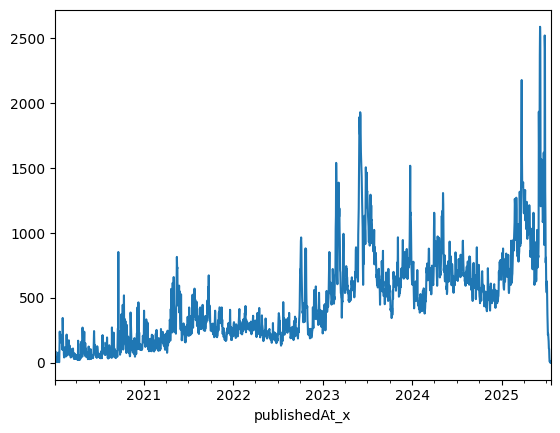

In [ ]:
df.groupby("authorId")["commentId"].count().sort_values(ascending=False).head(10)
df.groupby("videoId")["commentId"].count().sort_values(ascending=False).head(10)
df.resample("D", on="publishedAt_x")["commentId"].count().plot() # daily

# comments over time is increasing
# comments per author: to identify the top commenters (spam detection if too frequency)

<Axes: xlabel='publishedAt_y'>

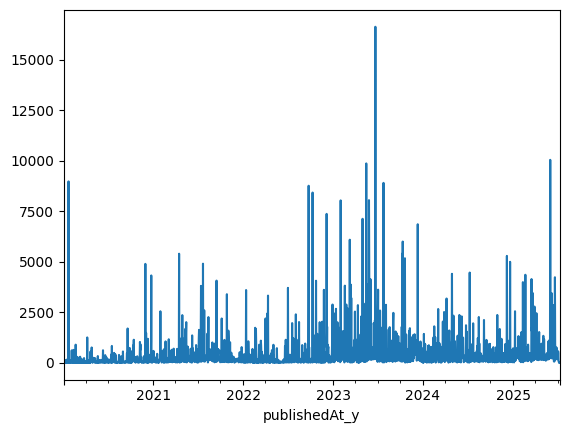

In [ ]:
df.groupby("authorId")["commentId"].count().sort_values(ascending=False).head(10)
df.groupby("videoId")["commentId"].count().sort_values(ascending=False).head(10)
df.resample("D", on="publishedAt_y")["commentId"].count().plot() # daily

In [ ]:
df["comment_length"] = df["textOriginal"].apply(len)
df["word_count"] = df["textOriginal"].apply(lambda x: len(x.split()))

print(df["comment_length"].describe())
print()
print(df["word_count"].describe())


count    945949.000000
mean         47.631447
std          84.609057
min           1.000000
25%          13.000000
50%          28.000000
75%          54.000000
max        9126.000000
Name: comment_length, dtype: float64

count    945949.000000
mean          8.922153
std          15.030954
min           1.000000
25%           2.000000
50%           5.000000
75%          10.000000
max        1537.000000
Name: word_count, dtype: float64


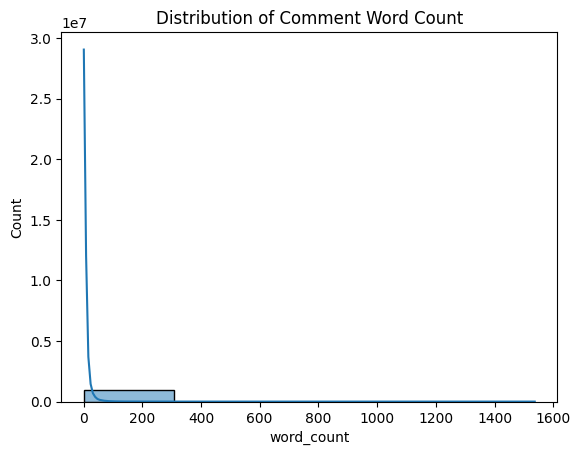

In [ ]:
sns.histplot(df["word_count"], bins=5, kde=True)
plt.title("Distribution of Comment Word Count")
plt.show()


<Axes: xlabel='text_length', ylabel='likeCount_x'>

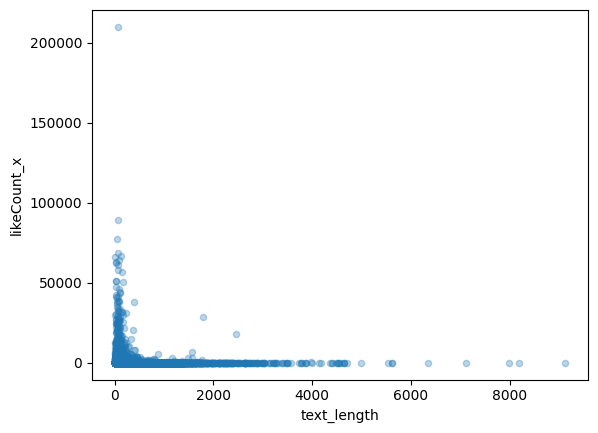

In [ ]:
# engagement analysis
df["text_length"] = df["textOriginal"].str.len()
df["word_count"] = df["textOriginal"].str.split().str.len()

df["likeCount_x"].describe()
df.groupby("videoId")["likeCount_x"].mean().sort_values(ascending=False).head(10)

df.plot.scatter(x="text_length", y="likeCount_x", alpha=0.3)

<Axes: xlabel='text_length', ylabel='likeCount_y'>

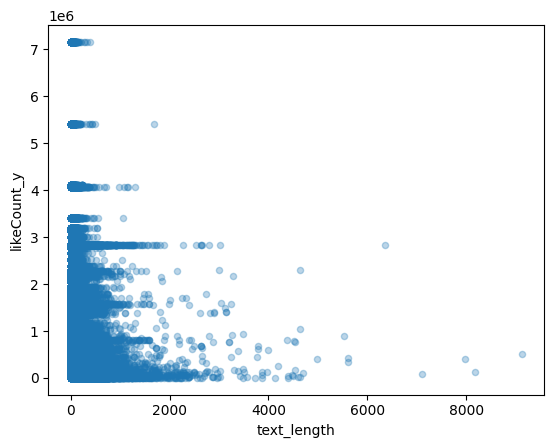

In [ ]:
# engagement analysis
df["text_length"] = df["textOriginal"].str.len()
df["word_count"] = df["textOriginal"].str.split().str.len()

df["likeCount_y"].describe()
df.groupby("videoId")["likeCount_y"].mean().sort_values(ascending=False).head(10)

df.plot.scatter(x="text_length", y="likeCount_y", alpha=0.3)

In [ ]:
# text analysis
from collections import Counter
import re

all_words = " ".join(df["textOriginal"].dropna().str.lower())
words = re.findall(r"\b\w+\b", all_words)
common_words = Counter(words).most_common(20)

print("Top words:", common_words)

# identify most common words after removing stopwords
# common keywords: beautiful / she / hair / ...

Top words: [('i', 234000), ('you', 200471), ('the', 173412), ('and', 137413), ('is', 125953), ('a', 123346), ('it', 119622), ('to', 117987), ('so', 96043), ('that', 78972), ('s', 71525), ('are', 68587), ('your', 67410), ('like', 67074), ('my', 66146), ('of', 63871), ('she', 62109), ('hair', 61767), ('t', 61759), ('beautiful', 61074)]


In [ ]:
# spam / anomaly detection
spammy_users = df.groupby("authorId")["commentId"].count().sort_values(ascending=False).head(10)
duplicate_comments = df["textOriginal"].value_counts().head(10)

# identify spam users (users posting too many comments in a short time)
# identify the duplicate/identical comments

In [ ]:
spammy_users

,commentId
authorId,
773251,2357
1064907,1293
1547846,1062
3525391,961
2121022,779
1308424,691
1859623,496
3381069,406
2567639,336


In [ ]:
duplicate_comments

,count
textOriginal,
❤,3334
India,2533
❤❤❤,2218
Nice,1850
❤❤,1770
Indian,1749
Wow,1662
Beautiful,1525
❤❤❤❤,1330


# **Feature Engineering**

In [ ]:
# install emoji
!pip install emoji

In [ ]:
from textblob import TextBlob
import emoji

def feature_engineering(df):
    # Textual Features
    df["char_count"] = df["textOriginal"].astype(str).apply(len)
    df["word_count"] = df["textOriginal"].astype(str).apply(lambda x: len(x.split()))
    df["avg_word_length"] = df["char_count"] / (df["word_count"] + 1)
    df["uppercase_ratio"] = df["textOriginal"].astype(str).apply(lambda x: sum(1 for c in x if c.isupper())/len(x) if len(x)>0 else 0)
    df["punctuation_count"] = df["textOriginal"].astype(str).apply(lambda x: len(re.findall(r"[!?]", x)))
    df["emoji_count"] = df["textOriginal"].astype(str).apply(lambda x: len([c for c in x if c in emoji.EMOJI_DATA]))
    df["duplicate_flag"] = df.duplicated(subset=["textOriginal"]).astype(int)

    # Sentiment Features
    df["sentiment_polarity"] = df["textOriginal"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    df["sentiment_subjectivity"] = df["textOriginal"].astype(str).apply(lambda x: TextBlob(x).sentiment.subjectivity)

    # Engagement Features
    df["log_likes"] = np.log1p(df["likeCount_x"])
    df["has_likes"] = (df["likeCount_x"] > 0).astype(int)
    df["log_likes"] = np.log1p(df["likeCount_y"])
    df["has_likes"] = (df["likeCount_y"] > 0).astype(int)

    # User Features
    df["author_comment_count"] = df.groupby("authorId")["commentId"].transform("count")
    df["avg_likes_per_author"] = df.groupby("authorId")["likeCount_x"].transform("mean")
    df["avg_likes_per_author"] = df.groupby("authorId")["likeCount_y"].transform("mean")

    return df

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import re

## Data Splitting

In [ ]:
df = feature_engineering(df)

In [ ]:
# spam detection
def label_spam(comment):
    text = comment.lower()
    if re.search(r"http|www|\.com|\.net|\.org", text):
        return 1

    promo_keywords = ["subscribe", "buy", "check my channel", "follow me", "sale", "discount", "free", "offer", "click"]
    if any(word in text for word in promo_keywords):
        return 1
    if len(re.findall(r'[!?.]{3,}', text)) > 0:  # excessive punctuation
        return 1

    if re.search(r"(.)\1{4,}", text):  # e.g., !!!!!, hhhhhh
        return 1

    if len(re.findall(r"[😀-🙏-❤]", text)) > 5:
        return 1

    if len(text.split()) <= 2:
        return 1

    return 0

df['spam'] = df['textOriginal'].apply(label_spam)
df['spam'] = df['title'].apply(label_spam)

In [ ]:
categories = {
    "skincare": [
    "cream", "lotion", "moisturizer", "skin", "hydration",
    "serum", "toner", "cleanser", "sunscreen", "spf",
    "acne", "pimple", "wrinkle", "anti-aging", "mask",
    "exfoliate", "scrub", "facewash", "oil", "essence"
    ],

    "fragrance": [
    "perfume", "scent", "smell", "fragrance",
    "cologne", "aroma", "eau de parfum", "eau de toilette",
    "notes", "fresh", "floral", "woody", "musky", "citrus"
    ],

    "makeup": [
    "lipstick", "foundation", "eyeliner", "blush", "makeup",
    "concealer", "mascara", "powder", "primer", "contour",
    "highlight", "palette", "bronzer", "shadow", "brows",
    "lip gloss", "setting spray"
    ]
}

def categorize(comment):
    for cat, keywords in categories.items():
        if any(word in comment for word in keywords):
            return cat
    return "other"

df["category"] = df['textOriginal'].apply(categorize)
df["category"] = df['title'].apply(categorize)

In [ ]:
# sentiment detection
def get_sentiment(comment):
    polarity = TextBlob(comment).sentiment.polarity
    if polarity > 0.05:
        return "positive"
    elif polarity < -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df['textOriginal'].apply(get_sentiment)
df["sentiment"] = df['title'].apply(get_sentiment)

In [ ]:
def is_quality(row):
    # Quality = Not Spam + Relevant Category + Has Sentiment
    if row["spam"] == 1:
        return 0
    if row["category"] == "other":
        return 0
    if row["sentiment"] == "neutral":
        return 0
    return 1

df["quality"] = df.apply(is_quality, axis=1)

# KPI
quality_ratio = df["quality"].mean()
print(f"Quality Comment Ratio: {quality_ratio:.2%}")


Quality Comment Ratio: 10.54%


In [ ]:
summary = df.groupby("category")["quality"].mean().reset_index()
print(summary)

print()
print(df.head())


    category   quality
0  fragrance  0.628606
1     makeup  0.289915
2      other  0.000000
3   skincare  0.382347

            kind_x  commentId  channelId_x  videoId  authorId  \
0  youtube#comment    1781382        14492    74288   2032536   
1  youtube#comment     289571        14727    79618   3043229   
2  youtube#comment     569077         3314    51826    917006   
3  youtube#comment    2957962         5008    58298   1853470   
4  youtube#comment     673093        21411     1265   2584166   

                                        textOriginal  parentCommentId  \
0  PLEASE LESBIAN FLAG I BEG YOU \n\nYou would ro...              NaN   
1   Apply mashed potato juice and mixed it with curd        3198066.0   
2                         69 missed calls from mars👽              NaN   
3                                               Baaa              NaN   
4    you look like raven from phenomena raven no cap              NaN   

   likeCount_x             publishedAt_x              

/tmp/ipython-input-2785933698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, order=["positive","negative","neutral"], palette="viridis")


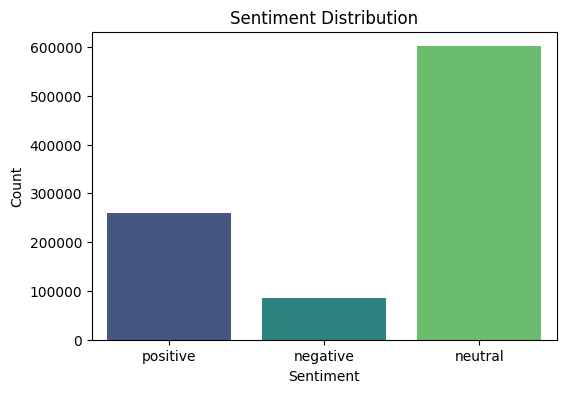

/tmp/ipython-input-2785933698.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_counts.index.map({0:"Not Spam",1:"Spam"}), y=spam_counts.values, palette="muted")


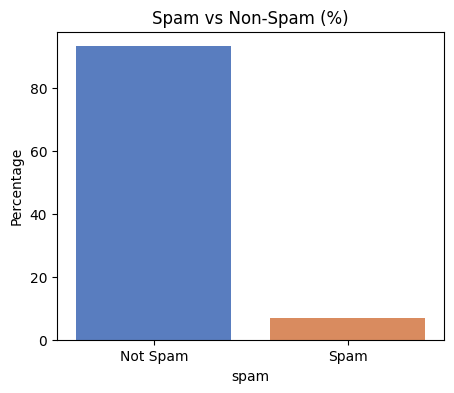

/tmp/ipython-input-2785933698.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette="Set2", order=df["category"].value_counts().index)


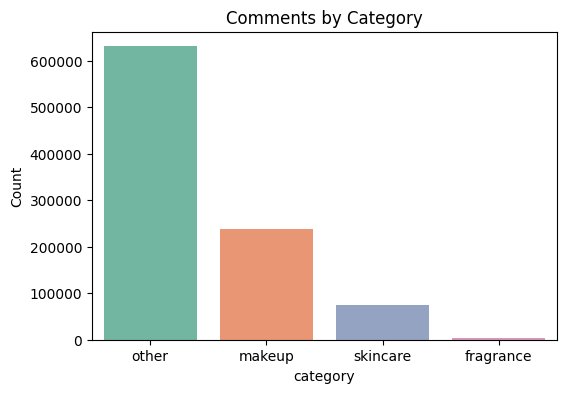

/tmp/ipython-input-2785933698.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="quality", data=quality_by_cat, palette="coolwarm")


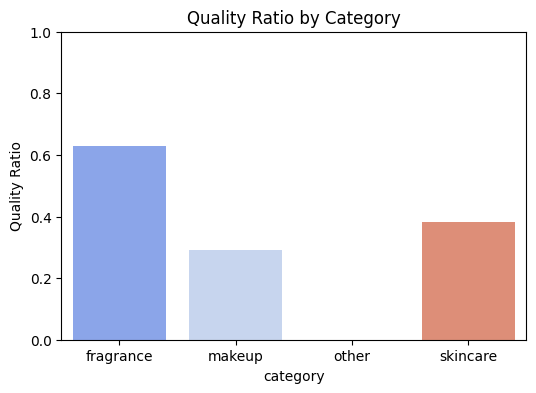

In [ ]:
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=["positive","negative","neutral"], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Spam ratio
plt.figure(figsize=(5,4))
spam_counts = df["spam"].value_counts(normalize=True) * 100
sns.barplot(x=spam_counts.index.map({0:"Not Spam",1:"Spam"}), y=spam_counts.values, palette="muted")
plt.title("Spam vs Non-Spam (%)")
plt.ylabel("Percentage")
plt.show()

# Category distribution
plt.figure(figsize=(6,4))
sns.countplot(x="category", data=df, palette="Set2", order=df["category"].value_counts().index)
plt.title("Comments by Category")
plt.ylabel("Count")
plt.show()

# Quality by category
plt.figure(figsize=(6,4))
quality_by_cat = df.groupby("category")["quality"].mean().reset_index()
sns.barplot(x="category", y="quality", data=quality_by_cat, palette="coolwarm")
plt.title("Quality Ratio by Category")
plt.ylabel("Quality Ratio")
plt.ylim(0,1)
plt.show()


In [ ]:
target = "quality"
drop_cols = ["kind_x", "kind_y", "textOriginal", "authorId", "commentId", "publishedAt_x",
             "publishedAt_y", "updatedAt", "sentiment", "category", "parentCommentId", "topicCategories",
             "tags", "title", "description", "defaultLanguage", "defaultAudioLanguage", "contentDuration"]  # non-numeric or IDs

X = df.drop(columns=drop_cols + [target], errors="ignore")
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

# split off the 20% test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# split the remaining 80% into 60% train & 20% validate
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

In [ ]:
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (567569, 26)
Val shape: (189190, 26)
Test shape: (189190, 26)


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

## Train multiple models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
}

In [ ]:
print(X_train.isnull().sum())

channelId_x               0
videoId                   0
likeCount_x               0
channelId_y               0
viewCount                 0
likeCount_y               0
commentCount              0
log_viewCount             0
log_likeCount_y           0
log_commentCount          0
comment_length            0
word_count                0
text_length               0
char_count                0
avg_word_length           0
uppercase_ratio           0
punctuation_count         0
emoji_count               0
duplicate_flag            0
sentiment_polarity        0
sentiment_subjectivity    0
log_likes                 0
has_likes                 0
author_comment_count      0
avg_likes_per_author      0
spam                      0
dtype: int64


In [ ]:
# train models and evaluate on validation set
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    y_val_proba = model.predict_proba(X_val_scaled)[:,1]

    results[name] = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "F1": f1_score(y_val, y_val_pred),
        "ROC AUC": roc_auc_score(y_val, y_val_proba)
    }

results_df = pd.DataFrame(results).T.sort_values(by="ROC AUC", ascending=False)
print("\nValidation Performance:")
print(results_df)

In [ ]:
# identify the best model
best_model_name = results_df.index[0]
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:,1]

print("\nFinal Test Performance:")
print(classification_report(y_test, y_test_pred))
print("ROC AUC (Test):", roc_auc_score(y_test, y_test_proba))

# **Deployment**

In [ ]:
import joblib

joblib.dump(best_model, "best_diabetes_model.joblib")
print(f"Best model pipeline saved as 'best_diabetes_model.joblib'")